In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
iris = datasets.load_iris()
X = iris.data
print(X[:10])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [3]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X = X[y != 0, :2]
y = y[y != 0]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [6]:
# n_sample = len(X)

In [7]:
# np.random.seed(0)
# order = np.random.permutation(n_sample)
# X = X[order]
# y = y[order].astype(np.float)

In [8]:
# X_train = X[:int(.9 * n_sample)]
# y_train = y[:int(.9 * n_sample)]
# X_test = X[int(.9 * n_sample):]
# y_test = y[int(.9 * n_sample):]

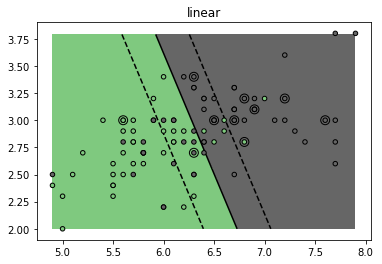

In [9]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Accent,
                edgecolor='k', s=20)
# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')
plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step=0.01), np.arange(y_min, y_max, step=0.01))

#decision_function returns distance of the samples X to the separating hyperplane
Z = classifier.decision_function(np.array([x_grid.ravel(), y_grid.ravel()]).T)

# Put the result into a color plot
Z = Z.reshape(x_grid.shape)
plt.pcolormesh(x_grid, y_grid, Z > 0, cmap=plt.cm.Accent)

plt.contour(x_grid, y_grid, Z, colors=['k', 'k', 'k'],
               linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('linear')
plt.show()

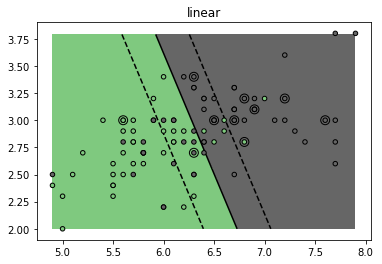

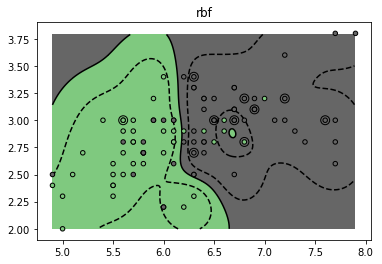

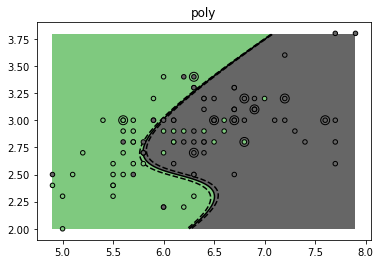

In [10]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    classifier = svm.SVC(kernel=kernel, gamma=10)
    classifier.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Accent,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step=0.01), np.arange(y_min, y_max, step=0.01))

    #decision_function returns distance of the samples X to the separating hyperplane
    Z = classifier.decision_function(np.array([x_grid.ravel(), y_grid.ravel()]).T)

    # Put the result into a color plot
    Z = Z.reshape(x_grid.shape)
    plt.pcolormesh(x_grid, y_grid, Z > 0, cmap=plt.cm.Accent)

    plt.contour(x_grid, y_grid, Z, colors=['k', 'k', 'k'],
                   linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()